In [1]:
import pandas as pd 
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
from datetime import datetime

In [15]:
monthly_data = pd.read_csv('NEW_MONTHLY_CANCELLED_Airport_Weather_Details.csv')
monthly_data

,Unnamed: 0,Date,Expected Departure Time,Expected Arrival Time,Distance,Latitude,Longitude,Max Temp,Precip,Wind Speed,Weather Delay
0,0,2015-01-31,1462.730400,1624.560000,815.451200,37.330344,-94.808253,41.860480,0.130328,15.828560,1250
1,1,2015-02-28,1444.616387,1614.942970,700.278166,36.233835,-93.590573,34.982379,0.558464,17.933264,4296
2,2,2015-03-31,1360.388857,1536.847641,659.683911,36.074900,-94.303525,41.971063,0.215969,18.882661,1759
3,3,2015-04-30,1527.305983,1673.449573,547.136752,37.343065,-94.701993,68.020684,0.797641,22.124957,585
4,4,2015-05-31,1602.527748,1719.332971,601.388466,34.606746,-95.210214,76.612514,0.829902,21.383025,919
5,5,2015-06-30,1628.681716,1712.124153,583.067720,38.650205,-91.337823,81.573702,0.993758,16.423025,886
6,6,2015-07-31,1722.312757,1748.345679,511.637860,39.207798,-95.472481,84.199588,0.280864,16.882305,243
7,7,2015-08-31,1656.808451,1750.912676,501.002817,40.420746,-90.249144,86.053521,0.177803,17.006197,355
8,8,2015-09-30,1738.096257,1829.973262,372.219251,41.265594,-88.596246,80.624064,0.935508,17.134225,187
9,9,2015-10-31,1651.320755,1716.765499,673.444744,33.603523,-97.217879,73.540701,2.633342,18.529380,371


In [17]:
monthly_data = monthly_data.drop(1)
monthly_data = monthly_data.drop(columns=["Unnamed: 0"])
monthly_data

,Date,Expected Departure Time,Expected Arrival Time,Distance,Latitude,Longitude,Max Temp,Precip,Wind Speed,Weather Delay
0,2015-01-31,1462.730400,1624.560000,815.451200,37.330344,-94.808253,41.860480,0.130328,15.828560,1250
2,2015-03-31,1360.388857,1536.847641,659.683911,36.074900,-94.303525,41.971063,0.215969,18.882661,1759
3,2015-04-30,1527.305983,1673.449573,547.136752,37.343065,-94.701993,68.020684,0.797641,22.124957,585
4,2015-05-31,1602.527748,1719.332971,601.388466,34.606746,-95.210214,76.612514,0.829902,21.383025,919
5,2015-06-30,1628.681716,1712.124153,583.067720,38.650205,-91.337823,81.573702,0.993758,16.423025,886
6,2015-07-31,1722.312757,1748.345679,511.637860,39.207798,-95.472481,84.199588,0.280864,16.882305,243
7,2015-08-31,1656.808451,1750.912676,501.002817,40.420746,-90.249144,86.053521,0.177803,17.006197,355
8,2015-09-30,1738.096257,1829.973262,372.219251,41.265594,-88.596246,80.624064,0.935508,17.134225,187
9,2015-10-31,1651.320755,1716.765499,673.444744,33.603523,-97.217879,73.540701,2.633342,18.529380,371
10,2015-11-30,1487.351675,1549.924641,606.083732,39.592703,-93.803461,47.443182,0.474821,24.244976,836


In [19]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 47
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     47 non-null     object 
 1   Expected Departure Time  47 non-null     float64
 2   Expected Arrival Time    47 non-null     float64
 3   Distance                 47 non-null     float64
 4   Latitude                 47 non-null     float64
 5   Longitude                47 non-null     float64
 6   Max Temp                 47 non-null     float64
 7   Precip                   47 non-null     float64
 8   Wind Speed               47 non-null     float64
 9   Weather Delay            47 non-null     int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 4.0+ KB


In [20]:
monthly_data["Date"] = monthly_data["Date"].astype('datetime64[ns]')
monthly_data["Month"] = monthly_data["Date"].dt.month_name()
monthly_data["Year"] = monthly_data["Date"].dt.year
monthly_data["Year"] = monthly_data["Year"].astype('object')
monthly_data.head()

,Date,Expected Departure Time,Expected Arrival Time,Distance,Latitude,Longitude,Max Temp,Precip,Wind Speed,Weather Delay,Month,Year
0,2015-01-31,1462.730400,1624.560000,815.451200,37.330344,-94.808253,41.860480,0.130328,15.828560,1250,January,2015
2,2015-03-31,1360.388857,1536.847641,659.683911,36.074900,-94.303525,41.971063,0.215969,18.882661,1759,March,2015
3,2015-04-30,1527.305983,1673.449573,547.136752,37.343065,-94.701993,68.020684,0.797641,22.124957,585,April,2015
4,2015-05-31,1602.527748,1719.332971,601.388466,34.606746,-95.210214,76.612514,0.829902,21.383025,919,May,2015
5,2015-06-30,1628.681716,1712.124153,583.067720,38.650205,-91.337823,81.573702,0.993758,16.423025,886,June,2015


In [21]:
monthly_data["X Label"] = monthly_data["Month"].astype(str) + " " + monthly_data["Year"].astype(str)
monthly_data.head()

,Date,Expected Departure Time,Expected Arrival Time,Distance,Latitude,Longitude,Max Temp,Precip,Wind Speed,Weather Delay,Month,Year,X Label
0,2015-01-31,1462.730400,1624.560000,815.451200,37.330344,-94.808253,41.860480,0.130328,15.828560,1250,January,2015,January 2015
2,2015-03-31,1360.388857,1536.847641,659.683911,36.074900,-94.303525,41.971063,0.215969,18.882661,1759,March,2015,March 2015
3,2015-04-30,1527.305983,1673.449573,547.136752,37.343065,-94.701993,68.020684,0.797641,22.124957,585,April,2015,April 2015
4,2015-05-31,1602.527748,1719.332971,601.388466,34.606746,-95.210214,76.612514,0.829902,21.383025,919,May,2015,May 2015
5,2015-06-30,1628.681716,1712.124153,583.067720,38.650205,-91.337823,81.573702,0.993758,16.423025,886,June,2015,June 2015


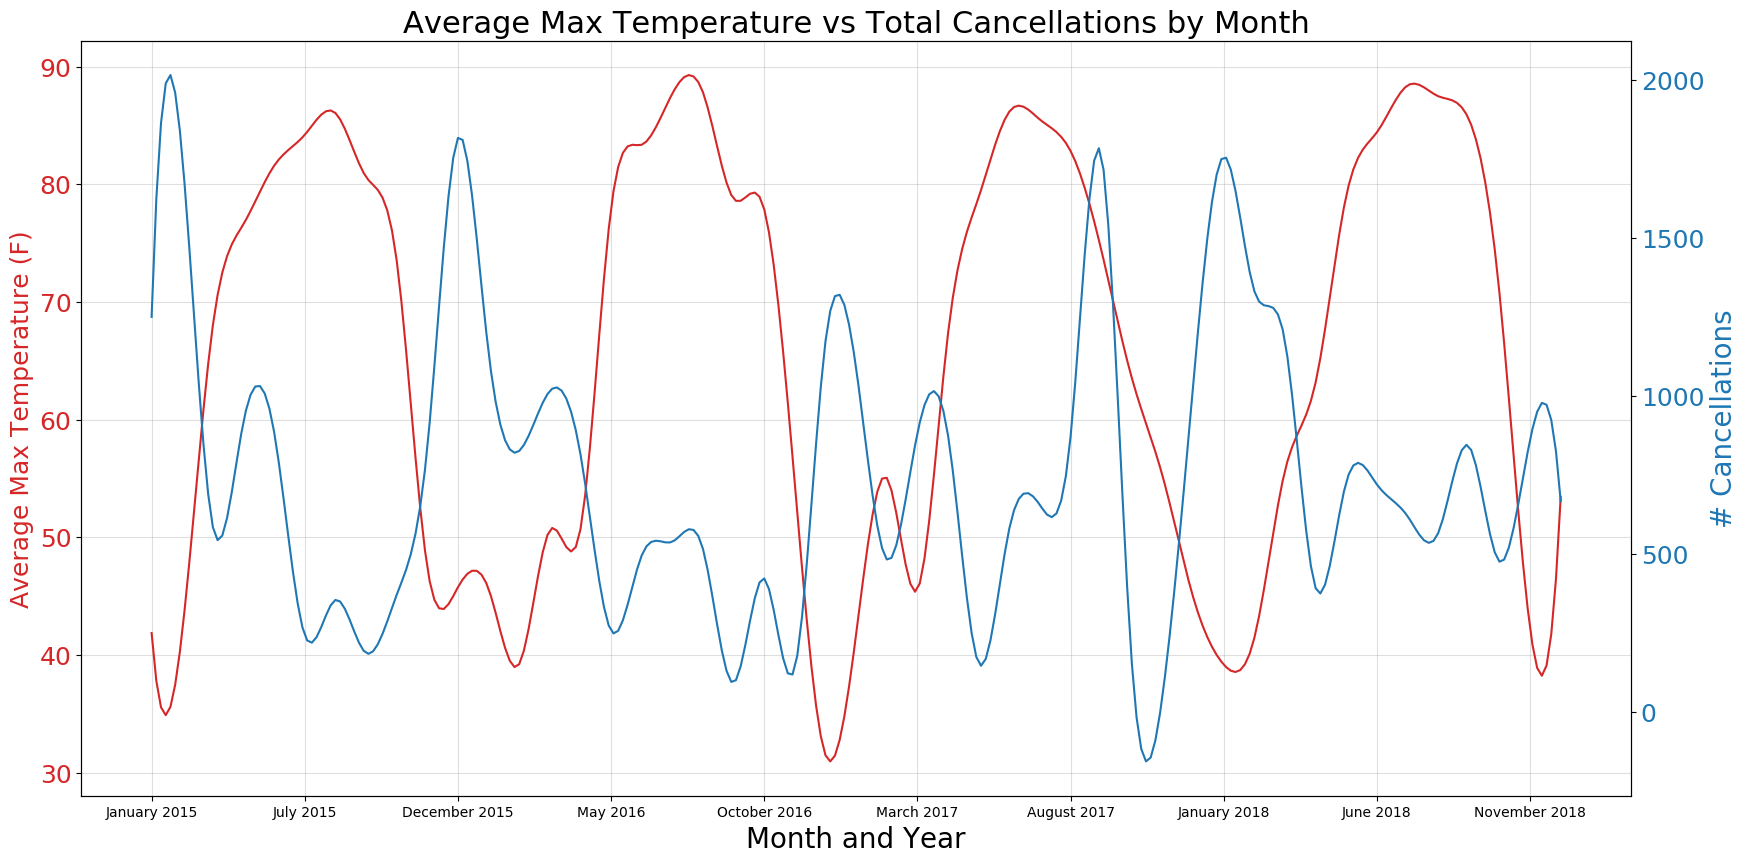

In [23]:
#Temp and Cancellations Over Time 
x = monthly_data["Date"]
y1 = monthly_data["Max Temp"]
y2 = monthly_data["Weather Delay"]
xlabels = monthly_data["X Label"]

idx = range(len(x))
xnew = np.linspace(min(idx), max(idx), 300)

spl = make_interp_spline(idx, y1, k=3)
smooth = spl(xnew)

spl2 = make_interp_spline(idx, y2, k=3)
smooth2 = spl2(xnew)

fig, ax1 = plt.subplots(1,1, figsize=(20,10), dpi=100)
ax1.set_xlabel('Month and Year', fontsize=20)
ax1.plot(xnew, smooth, color='tab:red')
ax1.set_ylabel("Average Max Temperature (F)", color='tab:red', fontsize=18)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red', labelsize=18)
ax1.grid(alpha=.4)

ax2 = ax1.twinx()
ax2.plot(xnew, smooth2, color='tab:blue')
ax2.set_ylabel("# Cancellations", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', rotation=0, labelcolor='tab:blue', labelsize=18)


plt.xticks(idx[::5], xlabels[::5])
plt.title("Average Max Temperature vs Total Cancellations by Month", fontsize=22)

plt.savefig('Plot Images/monthly_temp_vs_cancels.png')
plt.show()

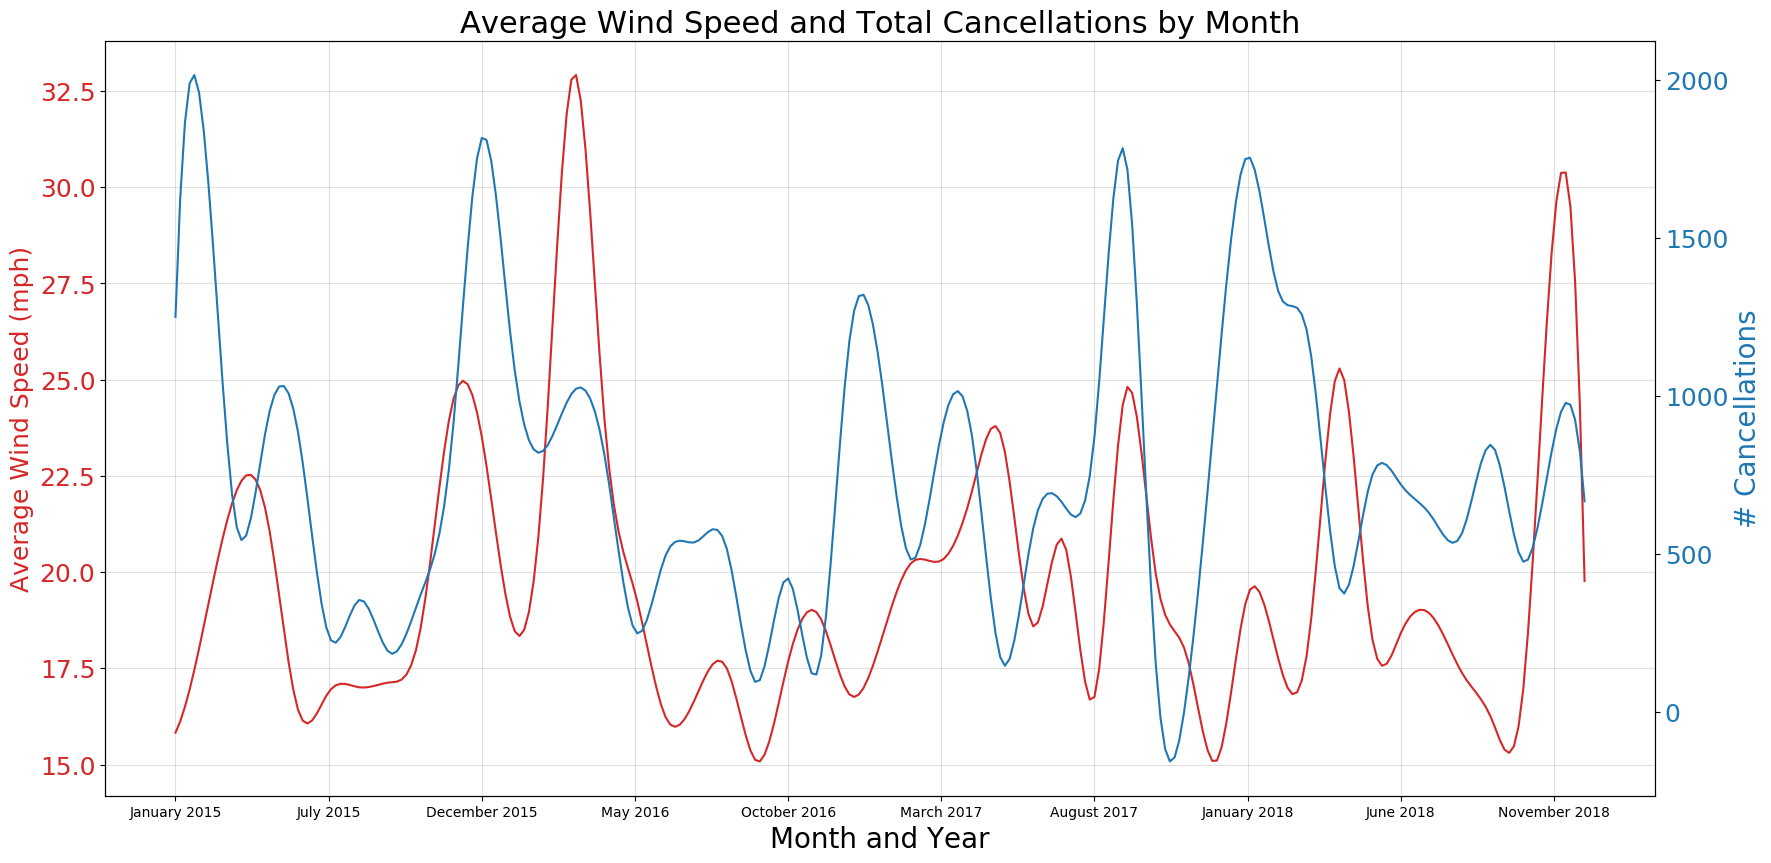

In [24]:
#Wind Speed and Cancellation Over Time

x = monthly_data["Date"]
y1 = monthly_data["Wind Speed"]
y2 = monthly_data["Weather Delay"]
xlabels = monthly_data["X Label"]

idx = range(len(x))
xnew = np.linspace(min(idx), max(idx), 300)

spl = make_interp_spline(idx, y1, k=3)
smooth = spl(xnew)

spl2 = make_interp_spline(idx, y2, k=3)
smooth2 = spl2(xnew)

fig, ax1 = plt.subplots(1,1, figsize=(20,10), dpi=100)
ax1.set_xlabel('Month and Year', fontsize=20)
ax1.plot(xnew, smooth, color='tab:red')
ax1.set_ylabel("Average Wind Speed (mph)", color='tab:red', fontsize=18)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red', labelsize=18)
ax1.grid(alpha=.4)

ax2 = ax1.twinx()
ax2.plot(xnew, smooth2, color='tab:blue')
ax2.set_ylabel("# Cancellations", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', rotation=0, labelcolor='tab:blue', labelsize=18)


plt.xticks(idx[::5], xlabels[::5])
plt.title("Average Wind Speed and Total Cancellations by Month", fontsize=22)

plt.savefig('Plot Images/monthly_windspeed_vs_cancels.png')
plt.show()


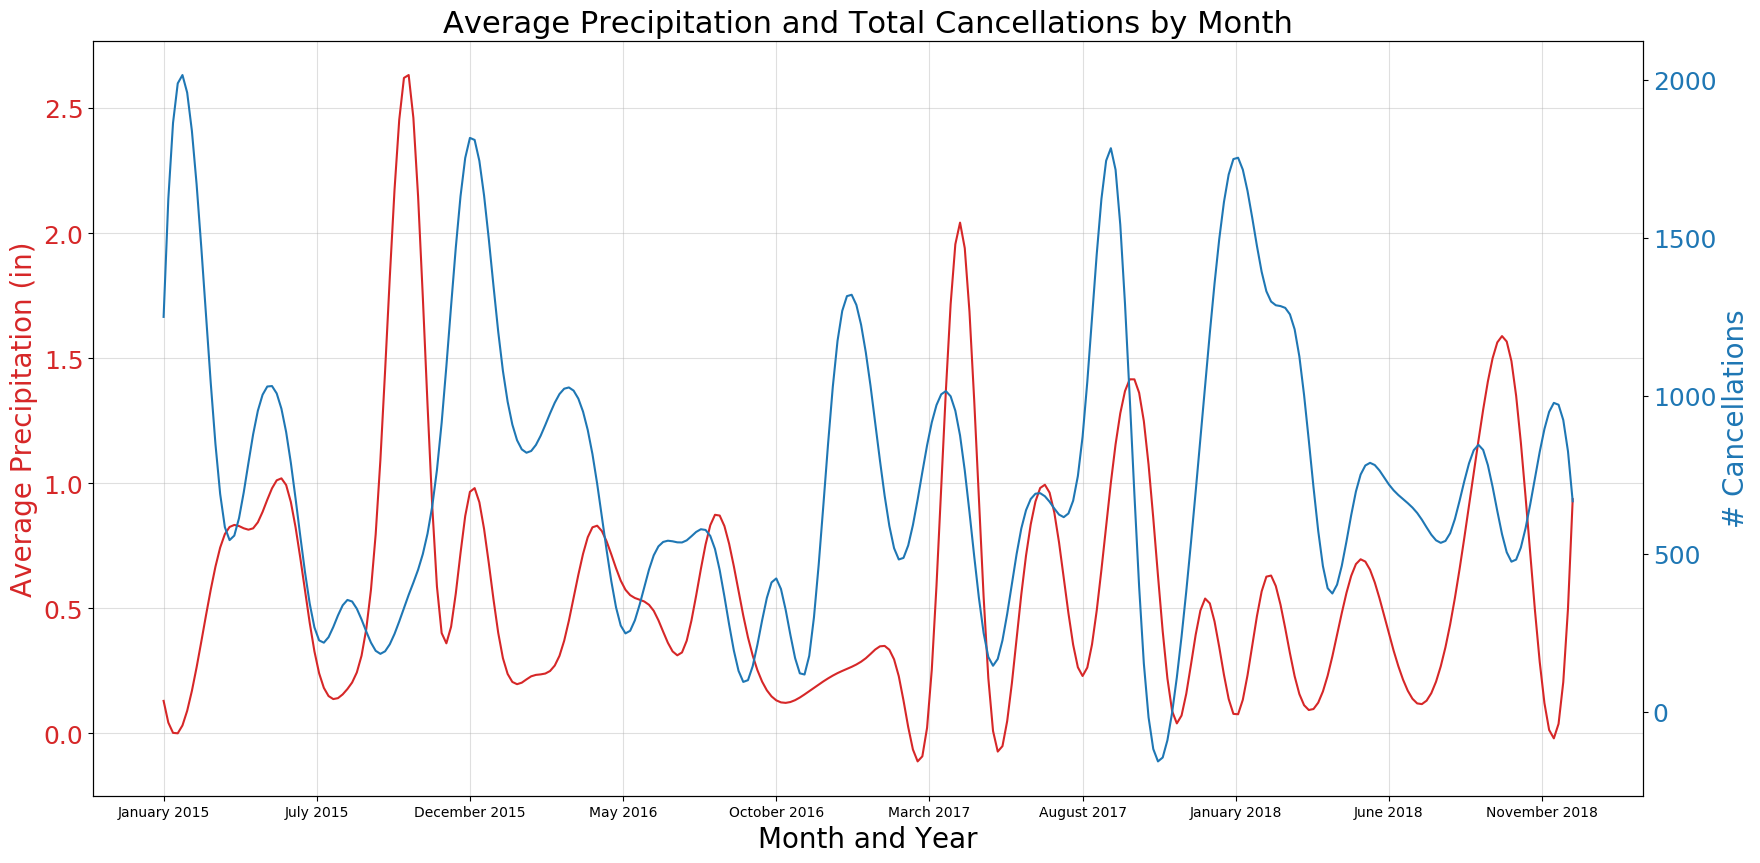

In [26]:
#Precip and Cancellation Over Time

x = monthly_data["Date"]
y1 = monthly_data["Precip"]
y2 = monthly_data["Weather Delay"]
xlabels = monthly_data["X Label"]

idx = range(len(x))
xnew = np.linspace(min(idx), max(idx), 300)

spl = make_interp_spline(idx, y1, k=3)
smooth = spl(xnew)

spl2 = make_interp_spline(idx, y2, k=3)
smooth2 = spl2(xnew)

fig, ax1 = plt.subplots(1,1, figsize=(20,10), dpi=100)
ax1.set_xlabel('Month and Year', fontsize=20)
ax1.plot(xnew, smooth, color='tab:red')
ax1.set_ylabel("Average Precipitation (in)", color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red', labelsize=18)
ax1.grid(alpha=.4)

ax2 = ax1.twinx()
ax2.plot(xnew, smooth2, color='tab:blue')
ax2.set_ylabel("# Cancellations", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', rotation=0, labelcolor='tab:blue', labelsize=18)


plt.xticks(idx[::5], xlabels[::5])
plt.title("Average Precipitation and Total Cancellations by Month", fontsize=22)

plt.savefig('Plot Images/monthly_precip_vs_cancels.png')
plt.show()
